<a href="https://colab.research.google.com/github/beingsonalisoni/Face-Detection/blob/main/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import all Libraries**

In [1]:
!pip install mtcnn
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import cv2

     |████████████████████████████████| 2.3 MB 5.0 MB/s 


# **2. Load Image in OpenCV**

In [2]:
# Load Image in OpenCV

image = cv2.cvtColor(cv2.imread("test3.jpg"), cv2.COLOR_BGR2RGB)
image

array([[[137, 130, 174],
        [136, 129, 173],
        [135, 128, 172],
        ...,
        [233, 182, 103],
        [233, 182, 103],
        [234, 183, 104]],

       [[138, 131, 175],
        [137, 130, 174],
        [136, 129, 173],
        ...,
        [234, 183, 104],
        [234, 183, 104],
        [234, 183, 104]],

       [[138, 131, 175],
        [137, 130, 174],
        [136, 129, 173],
        ...,
        [235, 184, 105],
        [235, 184, 105],
        [234, 183, 104]],

       ...,

       [[122, 125, 176],
        [121, 124, 175],
        [120, 123, 174],
        ...,
        [226, 171,  81],
        [226, 171,  81],
        [226, 171,  81]],

       [[122, 125, 176],
        [121, 124, 175],
        [119, 122, 173],
        ...,
        [226, 171,  81],
        [225, 170,  80],
        [225, 170,  80]],

       [[122, 125, 176],
        [121, 124, 175],
        [119, 122, 173],
        ...,
        [226, 171,  81],
        [225, 170,  80],
        [225, 170,  80]]

In [3]:
image.shape

(413, 620, 3)

# **3. Detect the Face using MTCNN**

In [4]:
detector = MTCNN()
results = detector.detect_faces(image)
results

[{'box': [280, 38, 59, 77],
  'confidence': 0.9999837875366211,
  'keypoints': {'left_eye': (289, 71),
   'mouth_left': (298, 97),
   'mouth_right': (321, 90),
   'nose': (299, 87),
   'right_eye': (313, 64)}},
 {'box': [47, 71, 50, 68],
  'confidence': 0.9999834299087524,
  'keypoints': {'left_eye': (61, 98),
   'mouth_left': (63, 121),
   'mouth_right': (85, 119),
   'nose': (76, 114),
   'right_eye': (86, 95)}},
 {'box': [156, 42, 57, 80],
  'confidence': 0.9999698400497437,
  'keypoints': {'left_eye': (179, 75),
   'mouth_left': (178, 103),
   'mouth_right': (199, 105),
   'nose': (194, 93),
   'right_eye': (204, 78)}},
 {'box': [435, 50, 56, 71],
  'confidence': 0.9997559189796448,
  'keypoints': {'left_eye': (447, 79),
   'mouth_left': (451, 106),
   'mouth_right': (472, 103),
   'nose': (459, 95),
   'right_eye': (471, 76)}},
 {'box': [390, 87, 46, 65],
  'confidence': 0.996222734451294,
  'keypoints': {'left_eye': (401, 113),
   'mouth_left': (403, 136),
   'mouth_right': (422,

In [5]:
len(results)

6

In [6]:
face1 = results[0]['box']

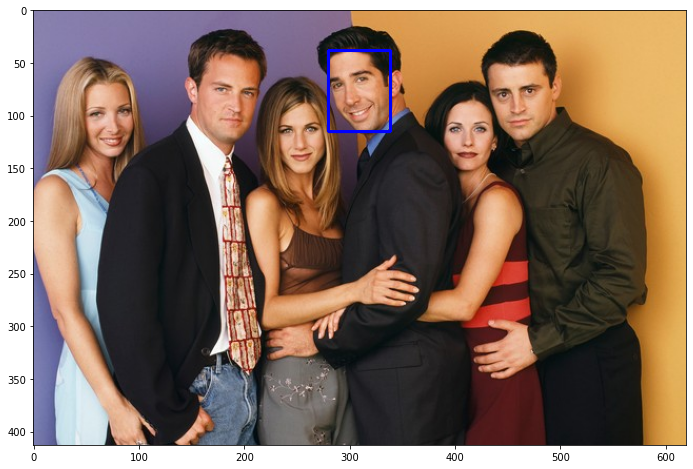

In [7]:
x , y , w , h = face1
cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)

plt.figure(figsize = (12,8))
plt.imshow(image)

# **4. Draw Box and Facial Features over the Faces**

In [8]:
# Defining Bounding Box and Facial Features

def plot_faces(imagepath, thickness = 5):
    image = cv2.cvtColor(cv2.imread(imagepath), cv2.COLOR_BGR2RGB)
  
    # Creating mtcnn model Object
    detector = MTCNN()
  
    # Passing the array into detect_Faces
    results = detector.detect_faces(image)
  
    for i in range(len(results)):
      x , y , w , h = results[i]['box']
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)

      left_eye = results[i]['keypoints']['left_eye']
      right_eye = results[i]['keypoints']['right_eye']
      mouth_left = results[i]['keypoints']['mouth_left']
      mouth_right = results[i]['keypoints']['mouth_right']
      nose = results[i]['keypoints']['nose']

      cv2.circle(image, left_eye, 2, (255, 255, 0), 2)
      cv2.circle(image, right_eye, 2, (255, 255, 0), 2)
      cv2.circle(image, mouth_left, 2, (255, 255, 0), 2)
      cv2.circle(image, mouth_right, 2, (255, 255, 0), 2)
      cv2.circle(image, nose, 2, (255, 255, 0), 2)

      # Print (results[i]['keypoints']['left_eye'])      
  
    plt.figure(figsize = (12, 8))
    plt.imshow(image)

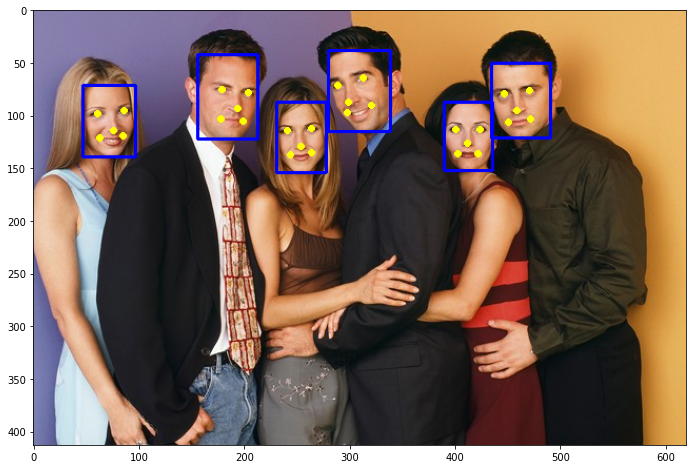

In [9]:
plot_faces("test3.jpg")

# **5. Crop and Save Image in Storage**

In [10]:
# Cropping the faces and saving them
image = cv2.cvtColor(cv2.imread("test3.jpg"), cv2.COLOR_BGR2RGB)

# Creating MTCNN model object
detector = MTCNN()

# Passing the array into detect_faces
results = detector.detect_faces(image)

# Multiple Faces
count = 0
for i in range(len(results)):
  count = count + 1
  face = results[i]['box']
  x, y, w, h = face
  cropped_array = image[y:y+h, x:x+w]
  print(cropped_array.shape)
  plt.imsave("face" + str(count) + ".jpg", cropped_array)

(77, 59, 3)
(68, 50, 3)
(80, 57, 3)
(71, 56, 3)
(65, 46, 3)
(67, 47, 3)
